In [1]:
from sqlalchemy import create_engine
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Extract CSVs (IMDB/ Kaggle movies datasets) into DataFrames

•Kaggle.com – IMDb (Movies/Ratings) 
://www.kaggle.com/stefanoleone992/imdb-extensive-dataset?select=IMDb+movies.csv)

•Kaggle.com – Golden Globe Awards
https://www.kaggle.com/unanimad/golden-globe-awards

In [2]:
IMDb_movies_file = "data/IMDb movies.csv"
IMDb_movies_df = pd.read_csv(IMDb_movies_file)
IMDb_movies_df.tail()

/Users/nimi/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
85850,tt9908390,Le lion,Le lion,2020,29/01/2020,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,...,"Dany Boon, Philippe Katerine, Anne Serra, Samu...",A psychiatric hospital patient pretends to be ...,5.3,398,NaN,NaN,"$3,507,171",NaN,NaN,4.0
85851,tt9911196,De Beentjes van Sint-Hildegard,De Beentjes van Sint-Hildegard,2020,13/02/2020,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,...,"Herman Finkers, Johanna ter Steege, Leonie ter...",A middle-aged veterinary surgeon believes his ...,7.7,724,NaN,NaN,"$7,299,062",NaN,6.0,4.0
85852,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,8/03/2019,Drama,130,India,Malayalam,Vineesh Aaradya,...,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",NaN,7.9,265,NaN,NaN,NaN,NaN,NaN,NaN
85853,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,15/03/2019,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,...,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",NaN,6.4,194,NaN,NaN,"$2,833",NaN,NaN,NaN
85854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,5/02/2020,Drama,74,Spain,Catalan,Laura Jou,...,"Maria Morera Colomer, Biel Rossell Pelfort, Is...","Pep, a 13-year-old boy, is in love with a girl...",6.7,102,NaN,NaN,"$59,794",NaN,NaN,2.0


In [3]:
gg_awards_file = "data/golden_globe_awards.csv"
gg_awards_df = pd.read_csv(gg_awards_file)
gg_awards_df.head()

,year_film,year_award,ceremony,category,nominee,film,win
0,1943,1944,1,Best Performance by an Actress in a Supporting...,Katina Paxinou,For Whom The Bell Tolls,True
1,1943,1944,1,Best Performance by an Actor in a Supporting R...,Akim Tamiroff,For Whom The Bell Tolls,True
2,1943,1944,1,Best Director - Motion Picture,Henry King,The Song Of Bernadette,True
3,1943,1944,1,Picture,The Song Of Bernadette,NaN,True
4,1943,1944,1,Actress In A Leading Role,Jennifer Jones,The Song Of Bernadette,True


In [4]:
IMDb_ratings_file = "data/IMDb ratings.csv"
IMDb_ratings_df = pd.read_csv(IMDb_ratings_file)
IMDb_ratings_df.head()

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


**Transform IMDb_movies_df**

In [79]:
# Create a filtered dataframe from specific columns
IMDb_movies_cols = ["imdb_title_id", "title","year","genre","country","avg_vote","worlwide_gross_income","reviews_from_users","reviews_from_critics"]
IMDb_movies_transformed= IMDb_movies_df[IMDb_movies_cols].copy()

# Rename the column headers
IMDb_movies_transformed = IMDb_movies_transformed.rename(columns={"imdb_title_id": "imdb_id",
                                                              "title": "movie_title",
                                                              "year" : "year_released",
                                                              "genre" : "genre",
                                                              "country": "country",
                                                              "avg_vote": "avg_vote",
                                                              "worlwide_gross_income" : "worldwide_gross_income",
                                                              "reviews_from_users":"reviews_from_users",
                                                              "reviews_from_critics":"reviews_from_critics"
                                                         })

# Clean the data by dropping duplicates  
IMDb_movies_transformed.drop_duplicates("imdb_id", inplace=True)

# Clean the data by dropping nulls  
IMDb_movies_transformed = IMDb_movies_transformed.dropna()

IMDb_movies_transformed.set_index("imdb_id", inplace=True)
IMDb_movies_transformed.to_csv('data/IMDb_movies_transformed.csv')

IMDb_movies_transformed.head()

,movie_title,year_released,genre,country,avg_vote,worldwide_gross_income,reviews_from_users,reviews_from_critics
imdb_id,,,,,,,,
tt0007183,Pikovaya dama,1916,"Drama, Fantasy, Horror",Russia,7.0,"$144,968",7.0,5.0
tt0010323,Il gabinetto del dottor Caligari,1920,"Fantasy, Horror, Mystery",Germany,8.1,"$8,811",237.0,160.0
tt0011440,Markens grøde,1921,Drama,Norway,6.6,"$4,272",3.0,3.0
tt0011741,Suds,1920,"Comedy, Drama, Romance",USA,6.3,"$772,155",9.0,1.0
tt0012190,I quattro cavalieri dell'Apocalisse,1921,"Drama, Romance, War",USA,7.2,"$9,183,673",45.0,16.0


**Transform IMDb_ratings_df**

In [71]:
# Create a filtered/ copied dataframe  
IMDb_ratings_transformed= IMDb_ratings_df.copy()

# Rename the column headers
IMDb_ratings_transformed = pd.DataFrame({"imdb_id":IMDb_ratings_df["imdb_title_id"],
                                   "imdb_rating":IMDb_ratings_df["mean_vote"],
                                   "total_votes":IMDb_ratings_df["total_votes"]      
                                       })

# Clean the data by dropping duplicates  
IMDb_ratings_transformed.drop_duplicates("imdb_id", inplace=True)

# Clean the data by dropping nulls  
IMDb_ratings_transformed = IMDb_ratings_transformed.dropna()

IMDb_ratings_transformed.to_csv('data/IMDb_ratings_transformed.csv')
IMDb_ratings_transformed.set_index("imdb_id", inplace=True)

IMDb_ratings_transformed.head()


,imdb_rating,total_votes
imdb_id,,
tt0000009,5.9,154
tt0000574,6.3,589
tt0001892,6.0,188
tt0002101,5.3,446
tt0002130,6.9,2237


**Transform golden_globe_awards dataframe**

In [72]:
# Create a filtered dataframe from specific columns
gg_cols = ["year_film","year_award","category","nominee","film","win"]
Golden_globe_transformed = gg_awards_df[gg_cols].copy()

#Golden_globe_transformed = gg_awards_df.loc[gg_awards_df["win"] != False]
# Rename the column headers
Golden_globe_transformed = pd.DataFrame({"movie_title":Golden_globe_transformed["film"],
                                         "nominee":Golden_globe_transformed["nominee"],
                                         "category": Golden_globe_transformed["category"],
                                        "year_released":Golden_globe_transformed["year_film"],
                                        "year_awarded":Golden_globe_transformed["year_award"],
                                         "category":Golden_globe_transformed["category"],
                                        "win":Golden_globe_transformed["win"]
                                       })

# Clean the data by dropping nulls  
Golden_globe_transformed = Golden_globe_transformed.dropna()
Golden_globe_transformed.to_csv('data/Golden_globe_transformed.csv')
Golden_globe_transformed.set_index("movie_title", inplace=True)
Golden_globe_transformed.tail()


,nominee,category,year_released,year_awarded,win
movie_title,,,,,
Chernobyl,Stellan Skarsgård,Best Performance by an Actor in a Supporting R...,2019,2020,True
"Kominsky Method, The",Alan Arkin,Best Performance by an Actor in a Supporting R...,2019,2020,False
Succession,Kieran Culkin,Best Performance by an Actor in a Supporting R...,2019,2020,False
Fleabag,Andrew Scott,Best Performance by an Actor in a Supporting R...,2019,2020,False
Barry,Henry Winkler,Best Performance by an Actor in a Supporting R...,2019,2020,False


In [73]:
#from config import pgadm_pass
#pgadm_pass

**Create database connection to load dataframes**

In [74]:
connection_string = "postgres:tiki@localhost:5432/movies_db"
engine = create_engine(f'postgresql+psycopg2://{connection_string}')
# Confirm tables
engine.table_names()

<ipython-input-74-8be52bbaae2c>:4: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['IMDB_ratings', 'imdb_ratings', 'golden_globe', 'imdb_movies', 'IMDB_movies']

In [80]:
IMDb_movies_transformed.to_sql(name='imdb_movies', con=engine, if_exists='append', index=True)
IMDb_movies_transformed = pd.read_sql("SELECT * FROM imdb_movies", engine)
IMDb_movies_transformed.head()

,imdb_id,movie_title,year_released,genre,country,avg_vote,worldwide_gross_income,reviews_from_users,reviews_from_critics
0,tt0007183,Pikovaya dama,1916,"Drama, Fantasy, Horror",Russia,7.0,"$144,968",7.0,5.0
1,tt0010323,Il gabinetto del dottor Caligari,1920,"Fantasy, Horror, Mystery",Germany,8.1,"$8,811",237.0,160.0
2,tt0011440,Markens grøde,1921,Drama,Norway,6.6,"$4,272",3.0,3.0
3,tt0011741,Suds,1920,"Comedy, Drama, Romance",USA,6.3,"$772,155",9.0,1.0
4,tt0012190,I quattro cavalieri dell'Apocalisse,1921,"Drama, Romance, War",USA,7.2,"$9,183,673",45.0,16.0


In [44]:
#IMDb_ratings_transformed.to_sql(name='imdb_ratings', con=engine, if_exists='append', index=True)
imdb_ratings_df = pd.read_sql("SELECT * FROM imdb_ratings", engine)
imdb_ratings_df.head()

,imdb_id,imdb_rating,total_votes
0,tt0000009,5.9,154
1,tt0000574,6.3,589
2,tt0001892,6.0,188
3,tt0002101,5.3,446
4,tt0002130,6.9,2237


In [55]:
#Golden_globe_transformed.to_sql(name='golden_globe', con=engine, if_exists='append', index=True)
gg_df = pd.read_sql("SELECT * FROM golden_globe", engine)
gg_df.head()

,movie_title,nominee,year_released,year_awarded,category,win
0,For Whom The Bell Tolls,Katina Paxinou,1943,1944,Best Performance by an Actress in a Supporting...,True
1,For Whom The Bell Tolls,Akim Tamiroff,1943,1944,Best Performance by an Actor in a Supporting R...,True
2,The Song Of Bernadette,Henry King,1943,1944,Best Director - Motion Picture,True
3,The Song Of Bernadette,Jennifer Jones,1943,1944,Actress In A Leading Role,True
4,Watch On The Rhine,Paul Lukas,1943,1944,Actor In A Leading Role,True


**Create pandas visualisations for below:**
1. Film/ TV Nominations that won the most awards
2. Film/ TV Nominations that won atleast 5 awards
3. Film Nominations that were nominated more than 15 times
4. Film Nominations with highest imdb_ratings 
5. Film Nominations with highest imdb_ratings and wins>1
6. Film Nominations with highest total votes
7. Film Nominations with highest reviews_from_critics
8. Film Nominations with highest worldwide gross income

In [8]:
#Film/ TV Nominations that won the most awards

film_most_awards = Golden_globe_transformed.groupby('movie_title')['win'].sum()
pd.DataFrame(film_most_awards[film_most_awards == film_most_awards.max()])

,win
movie_title,
Alice,7
"Carol Burnett Show, The",7
M*A*S*H (TV Show),7


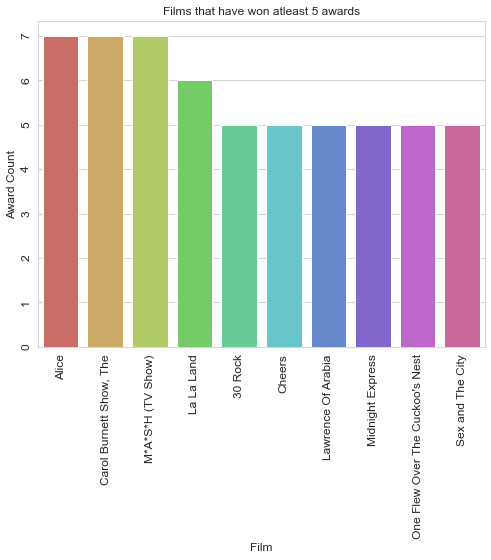

In [9]:
# Film/ TV Nominations that won atleast 5 awards

more_5_films = Golden_globe_transformed.groupby('movie_title')['win'].sum()
more_5_films = more_5_films.reset_index()
more_5_films = more_5_films[more_5_films['win'] >= 5].sort_values(ascending=False, by='win')

plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.barplot(x='movie_title', y='win', data=more_5_films, palette='hls')
plt.title('Films that have won atleast 5 awards', fontsize=12)
plt.xlabel('Film', fontsize=12)

plt.ylabel('Award Count', fontsize=12)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=90, fontsize=12)
plt.savefig("Visualisations/Films that have won atleast 5 awards.png")


plt.show()

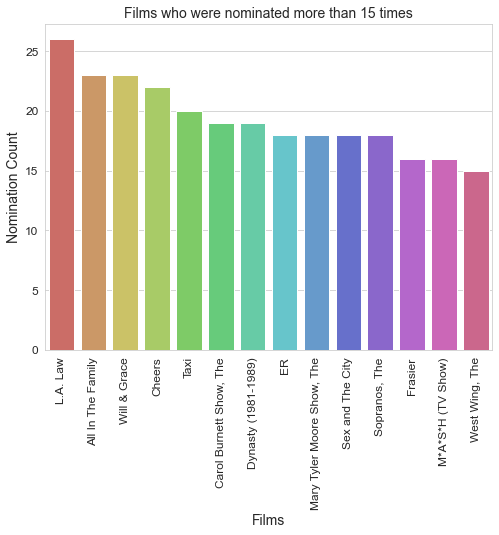

In [10]:
# Film Nominations that were nominated more than 15 times

more_15_nominated = Golden_globe_transformed.groupby('movie_title')['win'].count()
more_15_nominated = more_15_nominated.reset_index()
more_15_nominated = more_15_nominated[more_15_nominated['win'] >= 15].sort_values(ascending=False, by='win')

# top_10_nominated
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.barplot(x='movie_title', y='win', data=more_15_nominated, palette='hls')
plt.title('Films who were nominated more than 15 times', fontsize=14)
plt.xlabel('Films', fontsize=14)
plt.ylabel('Nomination Count', fontsize=14)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.savefig("Visualisations/Films who were nominated more than 15 times.png")
plt.show()

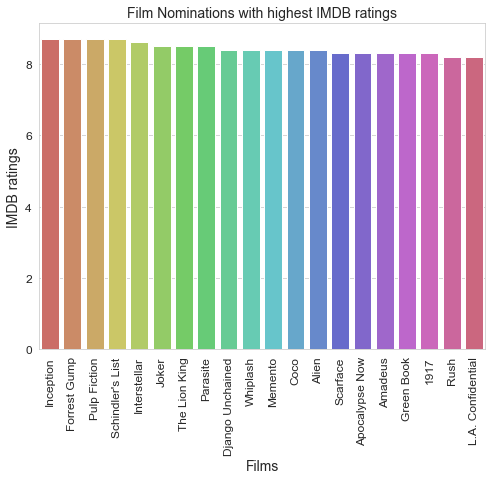

In [11]:
# Film Nominations with top 20 imdb_ratings  
merged_movies_df = pd.merge(Golden_globe_transformed, IMDb_movies_transformed, on="movie_title")
merged_df = pd.merge(IMDb_ratings_transformed, merged_movies_df, on="imdb_ID")

#highest_imdb_ratings = merged_df('imdb_rating')['imdb_rating'].max()
cols = ['imdb_ID','imdb_rating','total_votes','movie_title','win','reviews_from_critics','worldwide_gross_income']
merged_select_df = merged_df[cols].copy()

#Get the highest/max imdb rating after grouping rows by movie titles and sort to get top 20
highest_imdb_ratings = merged_select_df.groupby('movie_title')['imdb_rating'].max()
highest_imdb_ratings = highest_imdb_ratings.reset_index()
highest_imdb_ratings = highest_imdb_ratings.sort_values(by = ['imdb_rating'], ascending=False).iloc[0:20]
 
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.barplot(x='movie_title', y='imdb_rating', data = highest_imdb_ratings, palette='hls')
plt.title('Film Nominations with highest IMDB ratings', fontsize=14)
plt.xlabel('Films', fontsize=14)
plt.ylabel('IMDB ratings', fontsize=14)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.savefig("Visualisations/Film Nominations with highest IMDB ratings.png")
plt.show()



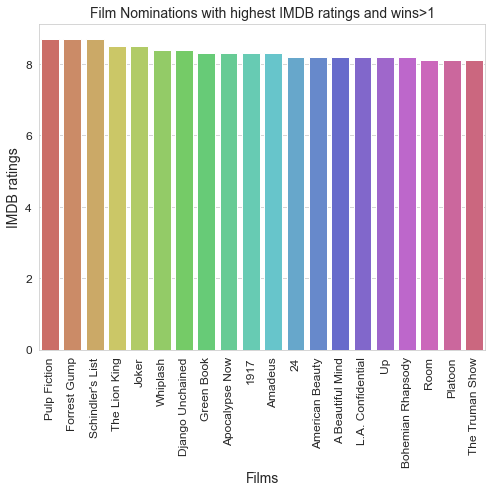

In [12]:
# Film Nominations with highest imdb_ratings and wins>1

highest_imdb_wins = merged_select_df[merged_select_df['win'] == True].sort_values(ascending=False, by='win')
highest_imdb_wins = highest_imdb_wins.groupby('movie_title')['imdb_rating'].max()
highest_imdb_wins = highest_imdb_wins.reset_index()
highest_imdb_wins = highest_imdb_wins.sort_values(by = ['imdb_rating'], ascending=False).iloc[0:20]
 
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.barplot(x='movie_title', y='imdb_rating', data = highest_imdb_wins, palette='hls')
plt.title('Film Nominations with highest IMDB ratings and wins>1', fontsize=14)
plt.xlabel('Films', fontsize=14)
plt.ylabel('IMDB ratings', fontsize=14)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.savefig("Visualisations/Film Nominations with highest IMDB ratings and wins>1.png")
plt.show()


In [13]:
merged_select_df.tail()

,imdb_ID,imdb_rating,total_votes,movie_title,win,reviews_from_critics,worldwide_gross_income
1101,tt8579674,8.3,362897,1917,True,474.0,"$384,857,224"
1102,tt8579674,8.3,362897,1917,False,474.0,"$384,857,224"
1103,tt8883524,6.0,5106,Bloodline,False,37.0,"$36,725"
1104,tt8995218,5.7,2008,Z,True,40.0,"$12,751"
1105,tt9077038,7.2,444,Monster,True,3.0,"$19,705"


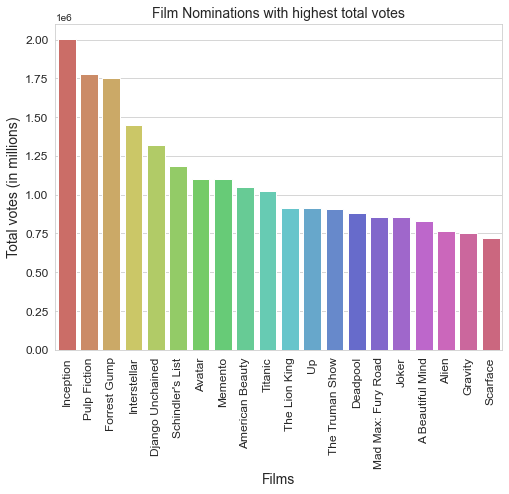

In [14]:
# Film Nominations with highest total votes

highest_total_votes = merged_select_df.groupby('movie_title')['total_votes'].max()
highest_total_votes = highest_total_votes.reset_index()
highest_total_votes = highest_total_votes.sort_values(by = ['total_votes'], ascending=False).iloc[0:20]

plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.barplot(x='movie_title', y='total_votes', data = highest_total_votes, palette='hls')
plt.title('Film Nominations with highest total votes', fontsize=14)
plt.xlabel('Films', fontsize=14)
plt.ylabel('Total votes (in millions)', fontsize=14)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.savefig("Visualisations/Film Nominations with highest total votes.png")
plt.show()

 

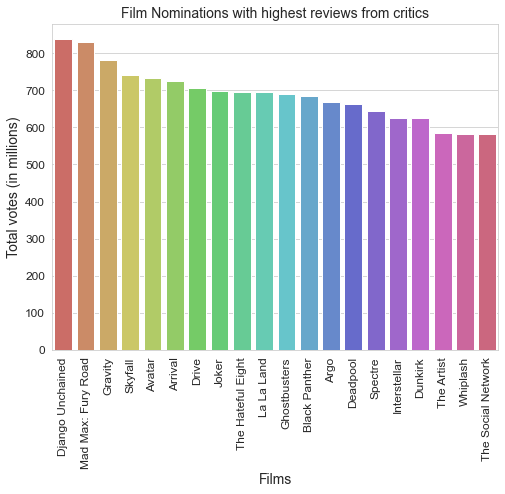

In [15]:
#Film Nominations with highest reviews_from_critics
highest_reviews_from_critics = merged_select_df.groupby('movie_title')['reviews_from_critics'].max()
highest_reviews_from_critics = highest_reviews_from_critics.reset_index()
highest_reviews_from_critics = highest_reviews_from_critics.sort_values(by = ['reviews_from_critics'], ascending=False).iloc[0:20]

plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.barplot(x='movie_title', y='reviews_from_critics', data = highest_reviews_from_critics, palette='hls')
plt.title('Film Nominations with highest reviews from critics', fontsize=14)
plt.xlabel('Films', fontsize=14)
plt.ylabel('Total votes (in millions)', fontsize=14)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.savefig("Visualisations/Film Nominations with highest reviews from critics.png")
plt.show()

In [26]:
#Film Nominations with highest worldwide_gross_income

highest_worldwide_gross_income = merged_select_df.groupby('movie_title')['worldwide_gross_income'].max()
highest_worldwide_gross_income = highest_worldwide_gross_income.reset_index()
highest_worldwide_gross_income = highest_worldwide_gross_income.dropna()
highest_worldwide_gross_income['worldwide_gross_income'] = highest_worldwide_gross_income['worldwide_gross_income'].str.replace('$', '',regex=True)
highest_worldwide_gross_income['worldwide_gross_income'] = highest_worldwide_gross_income['worldwide_gross_income'].str.replace('INR ', '',regex=True)
highest_worldwide_gross_income['worldwide_gross_income'] = highest_worldwide_gross_income['worldwide_gross_income'].str.replace(',', '',regex=True)
highest_worldwide_gross_income["worldwide_gross_income"] = highest_worldwide_gross_income["worldwide_gross_income"].astype(int)
highest_worldwide_gross_income = highest_worldwide_gross_income.sort_values(by = ['worldwide_gross_income'], ascending=False).iloc[0:20]
highest_worldwide_gross_income.head()

,movie_title,worldwide_gross_income
38,Avatar,2790439092
394,Titanic,2195169869
66,Black Panther,1347280838
349,Skyfall,1108561013
16,Alice in Wonderland,1025467110


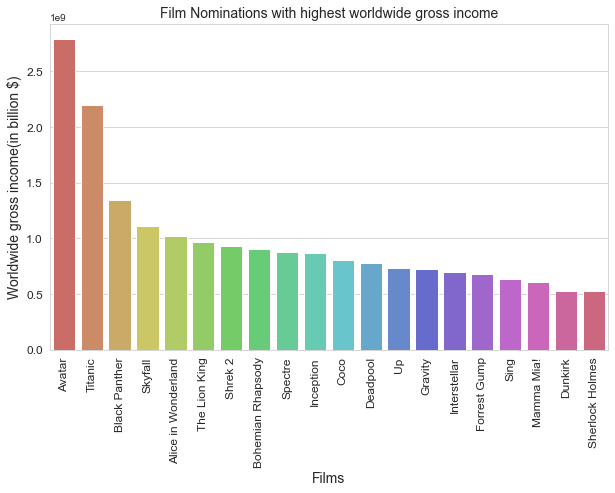

In [27]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.barplot(x='movie_title', y='worldwide_gross_income', data = highest_worldwide_gross_income, palette='hls')
plt.title('Film Nominations with highest worldwide gross income', fontsize=14)
plt.xlabel('Films', fontsize=14)
plt.ylabel('Worldwide gross income(in billion $)', fontsize=14)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.savefig("Visualisations/Film Nominations with highest worldwide gross income.png")
plt.show()

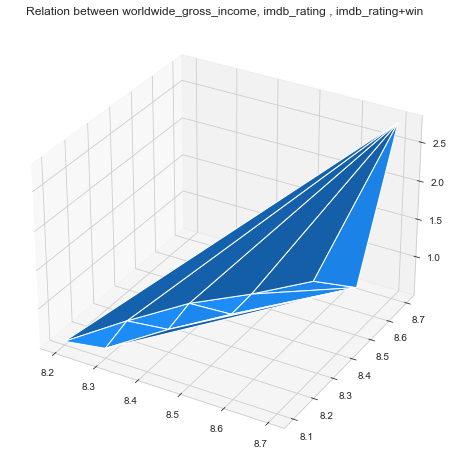

In [29]:
from mpl_toolkits import mplot3d

sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
ax = plt.axes(projection ='3d')

z = highest_worldwide_gross_income["worldwide_gross_income"]
x = highest_imdb_ratings["imdb_rating"]
y = highest_imdb_wins["imdb_rating"]


ax.plot_trisurf(x,y,z ,linewidth=1, antialiased=True, color='dodgerblue')
ax.set_title('Relation between worldwide_gross_income, imdb_rating , imdb_rating+win')

plt.savefig("Visualisations/Relation between worldwide_gross_income,imdb_ratings,wins.png")
plt.show()